In [8]:
# data manipulation and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for saving the pipeline
import joblib

#for loading json file
import json

# from Scikit-learn
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


import preprocessors as pp

In [9]:
# setting pandas to display all columns:
pd.set_option('display.max_column', None)

In [10]:
# load config.json file

with open('config.json') as config_file:
    config = json.load(config_file)

In [11]:
## Load data from the Google sheet directly:
sheet_id = config['sheet_id']

sheet_name = config['sheet_name']

url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

In [12]:
# load dataset
#data = pd.read_csv('data.csv')

data = pd.read_csv(url)

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(28, 23)


,Timestamp,Name of Lodge,How much is rent (preferably next year rent if you know) per year?,What is the name of most popular lodge in that street?,How many storeys/floors does the lodge have? (The lodge you are filling for),Are there some floors that are cheaper?,What utilities are available?,What's the present condition of the lodge?,How old is the lodge? (Approximate in years)\n,Is there a generator house for all the generators? (A place where all individual generators are kept),Can three cars park in comfortably?,How many streets away from Eziobodo Road?,What area is the lodge located?,What is the state of the road leading to the lodge?,Rate the security level of the lodge,Room Size,What is the general condition of the rooms?,Is wardrobe area available?,Floor finishing,Is there a separate balcony from kitchen?,What is the kitchen size?,What is the bathroom size?,What is the balcony size?
0,10/13/2023 11:04:42,Ezinne lodge,225,Ezinne lodge,3,No,"Electricity, Refuse disposal, Constant running...",5,3,No,No,2,Near Eziobodo Gate,2,4,3,5,Yes,Tiles,Yes,3.0,3.0,3.0
1,10/13/2023 11:11:26,Unity palace,"120,000",Chalgrove,1,No,"Electricity, Refuse disposal, Constant running...",3,9,No,No,1,NaN,3,4,4,3,No,Tiles,Yes,3.0,5.0,3.0
2,10/13/2023 11:39:41,Sylgor,200,Ezinne lodge,2,No,"Electricity, Refuse disposal, Constant running...",4,3,No,Yes,2,Near Eziobodo Gate,2,2,4,4,Yes,Tiles,Yes,5.0,4.0,5.0
3,10/13/2023 12:15:16,Great Achievers Home,130,Great Achievers Home,2,No,Lodge generator,3,5,No,Yes,0,Dombolo,2,2,5,4,No,Tiles,Yes,4.0,5.0,4.0
4,10/13/2023 12:17:59,Edwins Lodge,150000,Chimamanda Lodge,3,I don't know,"Electricity, Lodge generator",4,3,No,No,2,Near Eziobodo Gate,3,3,2,3,Yes,Tiles,Yes,1.0,1.0,2.0


Answers to the 'What utilities are available' question:

['electricity', 'Refuse disposal', 'Constant running water in rooms', 'Security post', 'Cleaners', 'Lodge generator(for electricity)', 'Solar']

In [13]:
# loading the previous dataset 'data.csv'

df = pd.read_csv('data.csv')

In [14]:
df.head(1)

,Id,Name,Rent,StrtName,Storeys,Cheaperflrs,Electricity,RefDisposal,RunWater,SecPost,Cleaners,LodgeGen,Solar,LgCond,Age,GenHouse,Parking,Distance,Location,RdCond,SecurityLvl,RmSize,RmCond,Wdrobe,Finishing,Balcony,KitchenSize,BathrmSize,BalcnySize
0,1101,Ezinne lodge,225000,Ezinne lodge,3,No,Yes,Yes,Yes,Yes,Yes,No,Yes,5,3,No,No,2,Near Eziobodo Gate,2,4,3,5,Yes,Tiles,Yes,3,3,3


In [15]:
df.columns

Index(['Id', 'Name', 'Rent', 'StrtName', 'Storeys', 'Cheaperflrs',
       'Electricity', 'RefDisposal', 'RunWater', 'SecPost', 'Cleaners',
       'LodgeGen', 'Solar', 'LgCond', 'Age', 'GenHouse', 'Parking', 'Distance',
       'Location', 'RdCond', 'SecurityLvl', 'RmSize', 'RmCond', 'Wdrobe',
       'Finishing', 'Balcony', 'KitchenSize', 'BathrmSize', 'BalcnySize'],
      dtype='object')

In [16]:
data.head(1)

,Timestamp,Name of Lodge,How much is rent (preferably next year rent if you know) per year?,What is the name of most popular lodge in that street?,How many storeys/floors does the lodge have? (The lodge you are filling for),Are there some floors that are cheaper?,What utilities are available?,What's the present condition of the lodge?,How old is the lodge? (Approximate in years)\n,Is there a generator house for all the generators? (A place where all individual generators are kept),Can three cars park in comfortably?,How many streets away from Eziobodo Road?,What area is the lodge located?,What is the state of the road leading to the lodge?,Rate the security level of the lodge,Room Size,What is the general condition of the rooms?,Is wardrobe area available?,Floor finishing,Is there a separate balcony from kitchen?,What is the kitchen size?,What is the bathroom size?,What is the balcony size?
0,10/13/2023 11:04:42,Ezinne lodge,225,Ezinne lodge,3,No,"Electricity, Refuse disposal, Constant running...",5,3,No,No,2,Near Eziobodo Gate,2,4,3,5,Yes,Tiles,Yes,3.0,3.0,3.0


In [17]:
# Attempting to split the answers in the 'What utilities are availale?' section into columns that can be used for modelling

all_utilities = set()
for row in data['What utilities are available?']:
    if isinstance(row, str):
        utilities = [utility.strip() for utility in row.split(',')]
        all_utilities.update(utilities)


In [18]:
all_utilities

{'Cleaners',
 'Constant running water in rooms',
 'Electricity',
 'Lodge generator',
 'Lodge generator(for electricity)',
 'Refuse disposal',
 'Security post',
 'Solar'}

Lodge generator and Lodge generator(for electricity) should hold the same information but from above would most likely be split into seperate columns, 

lets confirm if there are entries in the data that had these two occurrences:

In [19]:
set(data['What utilities are available?'].values)

{'Electricity',
 'Electricity, Constant running water in rooms, Security post, Cleaners, Lodge generator',
 'Electricity, Lodge generator',
 'Electricity, Refuse disposal',
 'Electricity, Refuse disposal, Cleaners, Lodge generator',
 'Electricity, Refuse disposal, Constant running water in rooms, Cleaners, Lodge generator',
 'Electricity, Refuse disposal, Constant running water in rooms, Lodge generator',
 'Electricity, Refuse disposal, Constant running water in rooms, Security post, Cleaners',
 'Electricity, Refuse disposal, Constant running water in rooms, Security post, Cleaners, Lodge generator',
 'Electricity, Refuse disposal, Constant running water in rooms, Security post, Cleaners, Lodge generator(for electricity)',
 'Electricity, Refuse disposal, Constant running water in rooms, Security post, Cleaners, Solar',
 'Electricity, Refuse disposal, Security post',
 'Electricity, Refuse disposal, Security post, Lodge generator',
 'Electricity, Security post',
 'Lodge generator',
 'Ref

Clearly there are, so this should be handled during data cleaning phase of the model building:

In [20]:
# Proceeding with engineering columns for the answers to 'What Utilities are available'

# Create columns for each utility and initialize with False
for utility in all_utilities:
    data[utility] = False

# Update the columns based on the 'What utilities are available?' column
for index, row in data.iterrows():
    if pd.notna(row['What utilities are available?']):
        utilities = [utility.strip() for utility in row['What utilities are available?'].split(',')]
        for utility in utilities:
            data.at[index, utility] = True


In [21]:
# dropping that column since its entries has been made into columns
data.drop('What utilities are available?',axis=1, inplace=True)

In [22]:
data.head(1)

,Timestamp,Name of Lodge,How much is rent (preferably next year rent if you know) per year?,What is the name of most popular lodge in that street?,How many storeys/floors does the lodge have? (The lodge you are filling for),Are there some floors that are cheaper?,What's the present condition of the lodge?,How old is the lodge? (Approximate in years)\n,Is there a generator house for all the generators? (A place where all individual generators are kept),Can three cars park in comfortably?,How many streets away from Eziobodo Road?,What area is the lodge located?,What is the state of the road leading to the lodge?,Rate the security level of the lodge,Room Size,What is the general condition of the rooms?,Is wardrobe area available?,Floor finishing,Is there a separate balcony from kitchen?,What is the kitchen size?,What is the bathroom size?,What is the balcony size?,Electricity,Constant running water in rooms,Lodge generator,Cleaners,Lodge generator(for electricity),Solar,Refuse disposal,Security post
0,10/13/2023 11:04:42,Ezinne lodge,225,Ezinne lodge,3,No,5,3,No,No,2,Near Eziobodo Gate,2,4,3,5,Yes,Tiles,Yes,3.0,3.0,3.0,True,True,False,True,False,True,True,True


In [23]:
data

,Timestamp,Name of Lodge,How much is rent (preferably next year rent if you know) per year?,What is the name of most popular lodge in that street?,How many storeys/floors does the lodge have? (The lodge you are filling for),Are there some floors that are cheaper?,What's the present condition of the lodge?,How old is the lodge? (Approximate in years)\n,Is there a generator house for all the generators? (A place where all individual generators are kept),Can three cars park in comfortably?,How many streets away from Eziobodo Road?,What area is the lodge located?,What is the state of the road leading to the lodge?,Rate the security level of the lodge,Room Size,What is the general condition of the rooms?,Is wardrobe area available?,Floor finishing,Is there a separate balcony from kitchen?,What is the kitchen size?,What is the bathroom size?,What is the balcony size?,Electricity,Constant running water in rooms,Lodge generator,Cleaners,Lodge generator(for electricity),Solar,Refuse disposal,Security post
0,10/13/2023 11:04:42,Ezinne lodge,225,Ezinne lodge,3,No,5,3,No,No,2,Near Eziobodo Gate,2,4,3,5,Yes,Tiles,Yes,3.0,3.0,3.0,True,True,False,True,False,True,True,True
1,10/13/2023 11:11:26,Unity palace,"120,000",Chalgrove,1,No,3,9,No,No,1,NaN,3,4,4,3,No,Tiles,Yes,3.0,5.0,3.0,True,True,True,False,False,False,True,False
2,10/13/2023 11:39:41,Sylgor,200,Ezinne lodge,2,No,4,3,No,Yes,2,Near Eziobodo Gate,2,2,4,4,Yes,Tiles,Yes,5.0,4.0,5.0,True,True,True,True,False,False,True,False
3,10/13/2023 12:15:16,Great Achievers Home,130,Great Achievers Home,2,No,3,5,No,Yes,0,Dombolo,2,2,5,4,No,Tiles,Yes,4.0,5.0,4.0,False,False,True,False,False,False,False,False
4,10/13/2023 12:17:59,Edwins Lodge,150000,Chimamanda Lodge,3,I don't know,4,3,No,No,2,Near Eziobodo Gate,3,3,2,3,Yes,Tiles,Yes,1.0,1.0,2.0,True,False,True,False,False,False,False,False
5,10/13/2023 14:30:49,Andy's villa,100,Ambassador's lodge,2,Yes,3,8,No,Yes,2,Near Eziobodo Gate,3,3,3,3,Yes,Tiles,No,3.0,3.0,3.0,True,False,False,False,False,False,False,False
6,10/13/2023 14:55:33,Dominion city,160,Dominion city,2,No,3,4,No,No,0,Near Sekani,3,4,4,4,Yes,Tiles,No,2.0,2.0,2.0,True,False,False,False,False,False,False,True
7,10/14/2023 1:59:06,Excellent’s Lodge,140,St. Nicholas,2,I don't know,3,7,No,No,1,Near Eziobodo Gate,3,4,3,3,Yes,Tiles,Yes,4.0,4.0,4.0,True,False,False,False,False,False,False,False
8,10/14/2023 6:46:11,Oslo villa,110,Oslo villa,3,Yes,2,10,No,Yes,0,Near Eziobodo Gate,1,4,3,3,NaN,Tiles,Yes,3.0,3.0,NaN,True,False,False,False,False,False,True,True
9,10/14/2023 7:25:34,St Joseph,70,David’s lodge,3,Yes,3,10,Yes,Yes,2,Near Sekani,3,2,3,4,Yes,Tiles,No,3.0,3.0,1.0,True,False,False,False,False,False,False,False


In [24]:
data = data.drop('Timestamp', axis=1)

In [25]:
# the resulting columns:
data.columns

Index(['Name of Lodge',
       'How much is rent (preferably next year rent if you know) per year?',
       'What is the name of most popular lodge in that street?',
       'How many storeys/floors does the lodge have? (The lodge you are filling for) ',
       'Are there some floors that are cheaper?',
       'What's the present condition of the lodge?',
       'How old is the lodge? (Approximate in years)\n',
       'Is there a generator house for all the generators? (A place where all individual generators are kept)',
       'Can three cars park in comfortably?',
       'How many streets away from Eziobodo Road?',
       'What area is the lodge located?',
       'What is the state of the road leading to the lodge?',
       'Rate the security level of the lodge', 'Room Size',
       'What is the general condition of the rooms?',
       'Is wardrobe area available?', 'Floor finishing',
       'Is there a separate balcony from kitchen?',
       'What is the kitchen size?', 'What is the 

The columns has now been split, The Model Building process can now resume for this engineered dataset.

In [26]:
data.columns = ['Name', 'Rent', 'StrtName', 'Storeys', 'Cheaperflrs', 'LgCond', 'Age', 'GenHouse', 'Parking', 'Distance',
       'Location', 'RdCond', 'SecurityLvl', 'RmSize', 'RmCond', 'Wdrobe',
       'Finishing', 'Balcony', 'KitchenSize', 'BathrmSize', 'BalcnySize', 
       'RefDisposal', 'LodgeGen', 'SecPost', 'Solar', 'RunWater', 'Cleaners',
       'Electricity', 'ElecLodgeGen']

In [27]:
# Convert the "rent" column to numeric (ignore errors for non-numeric values)
data['Rent'] = pd.to_numeric(data['Rent'], errors='coerce')

# Apply the condition to the "rent" column using a mask
mask = (data['Rent'].notna()) & (data['Rent'] < 1000)

# Multiply the values that meet the condition by 1000
data.loc[mask, 'Rent'] *= 1000

In [28]:
# Create a new 'Id' column with row IDs
data['ID'] = range(1, len(data) + 1)

# Reorder the columns so that 'ID' is the first column
data = data[['ID'] + [col for col in data if col != 'ID']]

In [29]:
data

,ID,Name,Rent,StrtName,Storeys,Cheaperflrs,LgCond,Age,GenHouse,Parking,Distance,Location,RdCond,SecurityLvl,RmSize,RmCond,Wdrobe,Finishing,Balcony,KitchenSize,BathrmSize,BalcnySize,RefDisposal,LodgeGen,SecPost,Solar,RunWater,Cleaners,Electricity,ElecLodgeGen
0,1,Ezinne lodge,225000.0,Ezinne lodge,3,No,5,3,No,No,2,Near Eziobodo Gate,2,4,3,5,Yes,Tiles,Yes,3.0,3.0,3.0,True,True,False,True,False,True,True,True
1,2,Unity palace,NaN,Chalgrove,1,No,3,9,No,No,1,NaN,3,4,4,3,No,Tiles,Yes,3.0,5.0,3.0,True,True,True,False,False,False,True,False
2,3,Sylgor,200000.0,Ezinne lodge,2,No,4,3,No,Yes,2,Near Eziobodo Gate,2,2,4,4,Yes,Tiles,Yes,5.0,4.0,5.0,True,True,True,True,False,False,True,False
3,4,Great Achievers Home,130000.0,Great Achievers Home,2,No,3,5,No,Yes,0,Dombolo,2,2,5,4,No,Tiles,Yes,4.0,5.0,4.0,False,False,True,False,False,False,False,False
4,5,Edwins Lodge,150000.0,Chimamanda Lodge,3,I don't know,4,3,No,No,2,Near Eziobodo Gate,3,3,2,3,Yes,Tiles,Yes,1.0,1.0,2.0,True,False,True,False,False,False,False,False
5,6,Andy's villa,100000.0,Ambassador's lodge,2,Yes,3,8,No,Yes,2,Near Eziobodo Gate,3,3,3,3,Yes,Tiles,No,3.0,3.0,3.0,True,False,False,False,False,False,False,False
6,7,Dominion city,160000.0,Dominion city,2,No,3,4,No,No,0,Near Sekani,3,4,4,4,Yes,Tiles,No,2.0,2.0,2.0,True,False,False,False,False,False,False,True
7,8,Excellent’s Lodge,140000.0,St. Nicholas,2,I don't know,3,7,No,No,1,Near Eziobodo Gate,3,4,3,3,Yes,Tiles,Yes,4.0,4.0,4.0,True,False,False,False,False,False,False,False
8,9,Oslo villa,110000.0,Oslo villa,3,Yes,2,10,No,Yes,0,Near Eziobodo Gate,1,4,3,3,NaN,Tiles,Yes,3.0,3.0,NaN,True,False,False,False,False,False,True,True
9,10,St Joseph,70000.0,David’s lodge,3,Yes,3,10,Yes,Yes,2,Near Sekani,3,2,3,4,Yes,Tiles,No,3.0,3.0,1.0,True,False,False,False,False,False,False,False


In [30]:
# Iterate through each column to handle NaN values
for col in data.columns:
    if data[col].dtype in [int, float]:
        # Replace NaN with the column's average
        data[col].fillna(data[col].mean(), inplace=True)
    elif data[col].dtype == 'object':
        # Replace NaN with the most common string value in the same column
        most_common = data[col].mode()[0]
        data[col].fillna(most_common, inplace=True)
    elif data[col].dtype == 'bool':
        # Replace NaN with the most frequent boolean value
        most_frequent = data[col].mode()[0]
        data[col].fillna(most_frequent, inplace=True)

In [31]:
data

,ID,Name,Rent,StrtName,Storeys,Cheaperflrs,LgCond,Age,GenHouse,Parking,Distance,Location,RdCond,SecurityLvl,RmSize,RmCond,Wdrobe,Finishing,Balcony,KitchenSize,BathrmSize,BalcnySize,RefDisposal,LodgeGen,SecPost,Solar,RunWater,Cleaners,Electricity,ElecLodgeGen
0,1,Ezinne lodge,225000.000000,Ezinne lodge,3,No,5,3,No,No,2,Near Eziobodo Gate,2,4,3,5,Yes,Tiles,Yes,3.000000,3.000000,3.000000,True,True,False,True,False,True,True,True
1,2,Unity palace,133409.090909,Chalgrove,1,No,3,9,No,No,1,Near Eziobodo Gate,3,4,4,3,No,Tiles,Yes,3.000000,5.000000,3.000000,True,True,True,False,False,False,True,False
2,3,Sylgor,200000.000000,Ezinne lodge,2,No,4,3,No,Yes,2,Near Eziobodo Gate,2,2,4,4,Yes,Tiles,Yes,5.000000,4.000000,5.000000,True,True,True,True,False,False,True,False
3,4,Great Achievers Home,130000.000000,Great Achievers Home,2,No,3,5,No,Yes,0,Dombolo,2,2,5,4,No,Tiles,Yes,4.000000,5.000000,4.000000,False,False,True,False,False,False,False,False
4,5,Edwins Lodge,150000.000000,Chimamanda Lodge,3,I don't know,4,3,No,No,2,Near Eziobodo Gate,3,3,2,3,Yes,Tiles,Yes,1.000000,1.000000,2.000000,True,False,True,False,False,False,False,False
5,6,Andy's villa,100000.000000,Ambassador's lodge,2,Yes,3,8,No,Yes,2,Near Eziobodo Gate,3,3,3,3,Yes,Tiles,No,3.000000,3.000000,3.000000,True,False,False,False,False,False,False,False
6,7,Dominion city,160000.000000,Dominion city,2,No,3,4,No,No,0,Near Sekani,3,4,4,4,Yes,Tiles,No,2.000000,2.000000,2.000000,True,False,False,False,False,False,False,True
7,8,Excellent’s Lodge,140000.000000,St. Nicholas,2,I don't know,3,7,No,No,1,Near Eziobodo Gate,3,4,3,3,Yes,Tiles,Yes,4.000000,4.000000,4.000000,True,False,False,False,False,False,False,False
8,9,Oslo villa,110000.000000,Oslo villa,3,Yes,2,10,No,Yes,0,Near Eziobodo Gate,1,4,3,3,Yes,Tiles,Yes,3.000000,3.000000,2.769231,True,False,False,False,False,False,True,True
9,10,St Joseph,70000.000000,David’s lodge,3,Yes,3,10,Yes,Yes,2,Near Sekani,3,2,3,4,Yes,Tiles,No,3.000000,3.000000,1.000000,True,False,False,False,False,False,False,False


## Model Development:

- Create a base model using the data retrieved from the URL directly after proper data cleaning and preprocessing

In [32]:
# Let's separate into train and test set
# Remember to set the seed (random_state for this sklearn function)

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['ID', 'Rent'], axis=1), # predictive variables
    data['Rent'], # target
    test_size=0.3, # portion of dataset to allocate to test set
    random_state=0, # we are setting the seed here
)

X_train.shape, X_test.shape

((19, 28), (9, 28))

In [33]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [34]:
# numerical variables with NA in train set
NUMERICAL_VARS_WITH_NA = ['KitchenSize', 'BathrmSize', 'BalcnySize']

# variables to map
SOME_VARS = ['Cheaperflrs', 'GenHouse', 'Parking', 'Wdrobe', 'Balcony']

MORE_VARS = ['RefDisposal', 'LodgeGen', 'SecPost', 'Solar', 'RunWater', 'Cleaners',
       'Electricity', 'ElecLodgeGen']

# categorical variables to encode
LOCATION_VARS = ['Location']

FINISHING_VARS = ['Finishing']

# variable mappings
SOME_MAPPINGS = {'No':1, 'I don\'t know':2,
                 'Yes':3}

MORE_MAPPINGS = {True:1, False:2}

LOCATION_MAPPINGS = {'Near Eziobodo Gate':1, 'Near Sekani':2,
                     'Around John Paul\'s Kitchen':3, 'Dombolo':4,
                     'Eziobodo Elu':5}

FINISHING_MAPPINGS = {'Tiles':1, 'Cement':2}

# the selected variables
FEATURES = ['Storeys', 'Cheaperflrs', 'LgCond', 'Age', 'GenHouse', 'Parking', 'Distance',
       'Location', 'RdCond', 'SecurityLvl', 'RmSize', 'RmCond', 'Wdrobe',
       'Finishing', 'Balcony', 'KitchenSize', 'BathrmSize', 'BalcnySize', 
       'RefDisposal', 'LodgeGen', 'SecPost', 'Solar', 'RunWater', 'Cleaners',
       'Electricity', 'ElecLodgeGen']





In [35]:
X_train = X_train[FEATURES]
X_test = X_test[FEATURES]

X_train.shape, X_test.shape

((19, 26), (9, 26))

In [36]:
price_pipe = Pipeline([
        # === mappers ===
    ('mapper_SOME', pp.Mapper(
        variables=SOME_VARS, mappings=SOME_MAPPINGS)),
    
    ('mapper_LOCATION', pp.Mapper(
        variables=LOCATION_VARS, mappings=LOCATION_MAPPINGS)),
    ('mapper_FINISHING', pp.Mapper(
        variables=FINISHING_VARS, mappings=FINISHING_MAPPINGS)),
    ('mapper_MORE', pp.Mapper(
        variables=MORE_VARS, mappings=MORE_MAPPINGS)),
        
    ('scaler', MinMaxScaler()),
#     ('selector', SelectFromModel(Lasso(alpha=0.001, random_state=0))),
    ('Lasso', Lasso(alpha=0.044, random_state=0))
])

In [37]:
# train the pipeline
price_pipe.fit(X_train, y_train)

Pipeline(steps=[('mapper_SOME',
                 Mapper(mappings={"I don't know": 2, 'No': 1, 'Yes': 3},
                        variables=['Cheaperflrs', 'GenHouse', 'Parking',
                                   'Wdrobe', 'Balcony'])),
                ('mapper_LOCATION',
                 Mapper(mappings={"Around John Paul's Kitchen": 3, 'Dombolo': 4,
                                  'Eziobodo Elu': 5, 'Near Eziobodo Gate': 1,
                                  'Near Sekani': 2},
                        variables=['Location'])),
                ('mapper_FINISHING',
                 Mapper(mappings={'Cement': 2, 'Tiles': 1},
                        variables=['Finishing'])),
                ('mapper_MORE',
                 Mapper(mappings={False: 2, True: 1},
                        variables=['RefDisposal', 'LodgeGen', 'SecPost',
                                   'Solar', 'RunWater', 'Cleaners',
                                   'Electricity', 'ElecLodgeGen'])),
                ('scaler', MinMaxScaler()),
                ('Lasso', Lasso(alpha=0.044, random_state=0))])

In [38]:
# evaluate the model:
# ====================

# make predictions for train set
pred = price_pipe.predict(X_train)

# determine mse, rmse and r2
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred), squared=False))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = price_pipe.predict(X_test)

# determine mse, rmse and r2
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average lodge price: ', int(np.exp(y_train).median()))

train mse: 979783830
train rmse: 31301
train r2: 0.3544003674587821

test mse: 1012066195
test rmse: 31812
test r2: 0.2942790520651528

Average lodge price:  133409


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

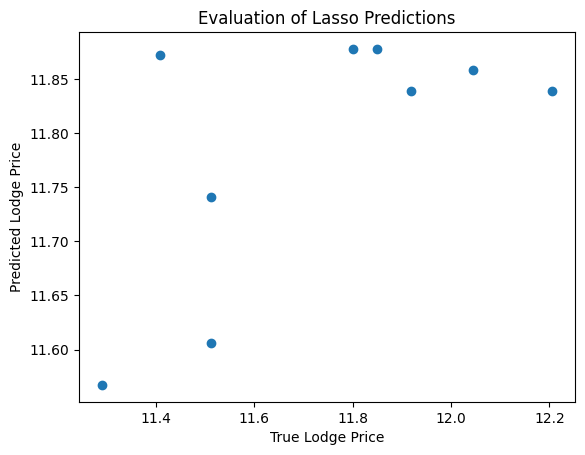

In [39]:
# let's evaluate our predictions respect to the real sale price
plt.scatter(y_test, price_pipe.predict(X_test))
plt.xlabel('True Lodge Price')
plt.ylabel('Predicted Lodge Price')
plt.title('Evaluation of Lasso Predictions')

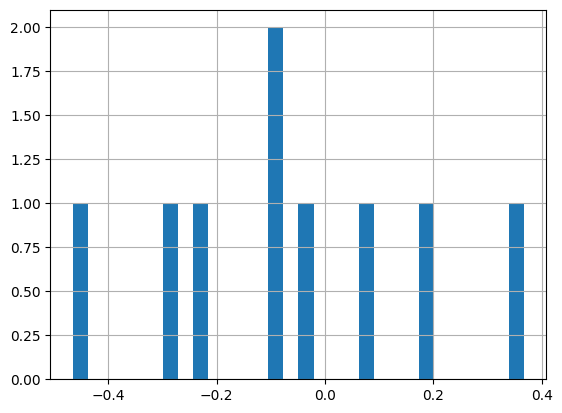

In [40]:
# let's evaluate the distribution of the errors: 
# they should be fairly normally distributed

y_test.reset_index(drop=True, inplace=True)

preds = pd.Series(price_pipe.predict(X_test))

errors = y_test - preds
errors.hist(bins=30)
plt.show()

In [41]:
# now let's save the scaler

joblib.dump(price_pipe, 'price_pipe.joblib') 

['price_pipe.joblib']